In [3]:
# the plots of the cells will be included in the output cell rather than in a separate window
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) # this code sets the size of the figure in matplotib

# reading the data
df = pd.read_csv('C:\\Users\\charles\\Desktop\\Jupiter\\data.csv')

print(df.shape) # to get the rows ad columns of the dataframe
#df= df.head(5)
df= df.set_index(['Car']) # setting the car column as the column index
print(df)

# this step is to check the relationship between volume and CO2 through linear regression
X = df['Volume'].values # taking the value of th x-axis
Y = df['CO2'].values

# since the relationship is based on the line y=mx+c, lets find the values of "m" and "c"

# mean of X and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# appying the formula to get the value of "m" which is the constant
numenator = 0
denomenator = 0

# length of the list
len_list = len(X)

for i in range(len_list):
    numenator += (X[i]-mean_x) * (Y[i]-mean_y)
    denomenator += (X[i]-mean_x) * (X[i]-mean_x)
    
# getting the value of m which is the constant in y=mx+c
m = numenator/denomenator

# getting the value of the constant c
c = (mean_y - (m * mean_x))
    
print(f"m={m} and c={c}")
print(f"y = {round(m, 2)}x + {round(c, 2)}")



(36, 6)
            Unnamed: 0       Model  Volume  Weight  CO2
Car                                                    
Toyoty               0        Aygo    1000     790   99
Mitsubishi           1  Space Star    1200    1160   95
Skoda                2      Citigo    1000     929   95
Fiat                 3         500     900     865   90
Mini                 4      Cooper    1500    1140  105
VW                   5         Up!    1000     929  105
Skoda                6       Fabia    1400    1109   90
Mercedes             7     A-Class    1500    1365   92
Ford                 8      Fiesta    1500    1112   98
Audi                 9          A1    1600    1150   99
Hyundai             10         I20    1100     980   99
Suzuki              11       Swift    1300     990  101
Ford                12      Fiesta    1000    1112   99
Honda               13       Civic    1600    1252   94
Hundai              14         I30    1600    1326   97
Opel                15       Astra    16

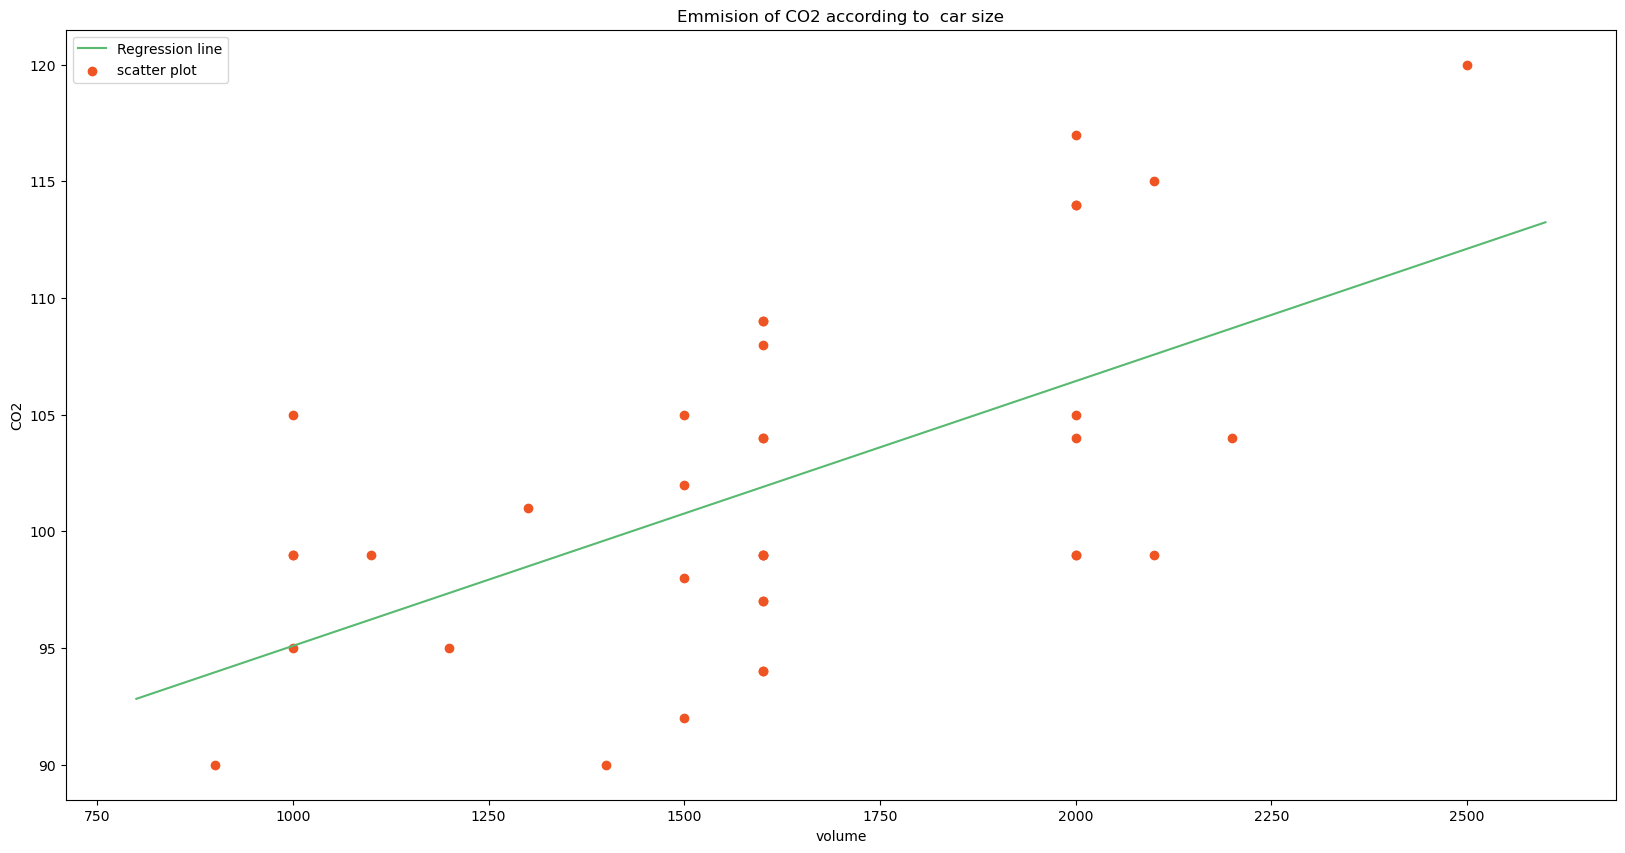

In [4]:
#  plotting values of the regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating the line values of x and y
x = np.linspace(min_x, max_x, 1000)
y = m*x + c

# plotting the line
plt.plot(x, y, color='#58b970', label='Regression line')
# plotting the scattering points
plt.scatter(X, Y, c='#ef5423', label='scatter plot')

plt.title('Emmision of CO2 according to  car size')
plt.xlabel('volume')
plt.ylabel('CO2')
plt.legend()

plt.show()


In [37]:
# calculating the r squared
ss_t = 0
ss_r = 0
for i in range(len_list):
    y_pred = (m*X[i] + c)
    ss_r += ((y_pred - mean_y)**2)
    ss_t += ((Y[i]-mean_y)**2)

r2 =(ss_r / ss_t)
print(r2)
     


0.3505608516055508


# linear regression using sklearn

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

df=pd.read_csv('C:\\Users\\charles\\Desktop\\Jupiter\\data.csv')
df.set_index(['Car'])

# taking the values of X and the values of Y
X = df['Volume'].values
Y = df['CO2'].values

# length of the list
len_list = len(X)

# linearRegression cannot use rank 1 matrix in scikit learn
X = X.reshape((len_list, 1))

# Creating a model
reg = LinearRegression()

# fitting the training data
reg = reg.fit(X, Y)

# Y_prediction
Y_pred = reg.predict(X)

# calculating the R2 score
r2_score = reg.score(X, Y)

print(r2_score)
    

0.3505608516055503
